# Multivariable_regression 
Crime in the united states 2013

[Crime in the U.S. 2013](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls)


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Explore data and prepare for initial model

In [2]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', skiprows=4)

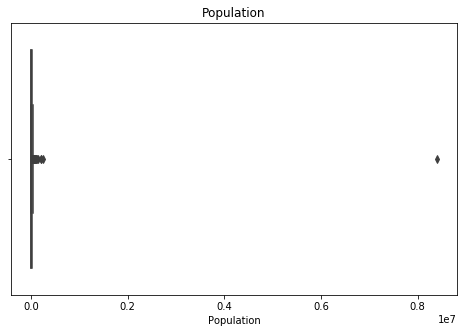

In [3]:
plt.figure(figsize=(8,5))

sns.boxplot(df['Population'])
plt.title('Population')

plt.show()

In [4]:
df[df['Population'] > 8000000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
216,New York,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,nan


In [5]:
#drop unnecessary columns
df = df[['Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']]

In [6]:
#remove extreme outlier
df = df[df['Population'] < df['Population'].quantile(0.95)]

In [7]:
df = df.dropna()

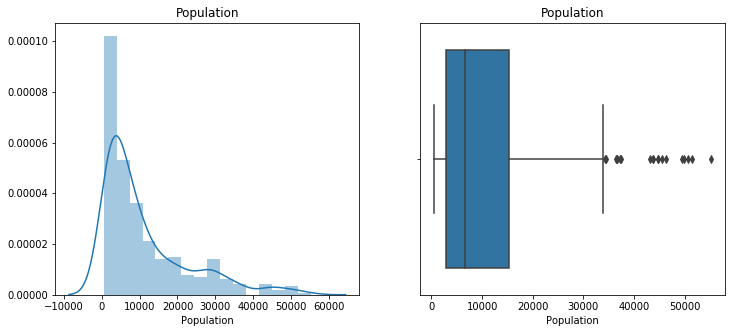

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Population'])
plt.title('Population')

plt.subplot(1, 2, 2)
sns.boxplot(df['Population'])
plt.title('Population')

plt.show()

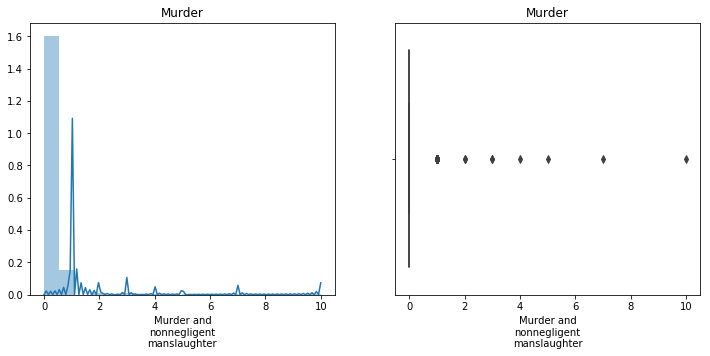

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Murder and\nnonnegligent\nmanslaughter'])
plt.title('Murder')

plt.subplot(1, 2, 2)
sns.boxplot(df['Murder and\nnonnegligent\nmanslaughter'])
plt.title('Murder')

plt.show()

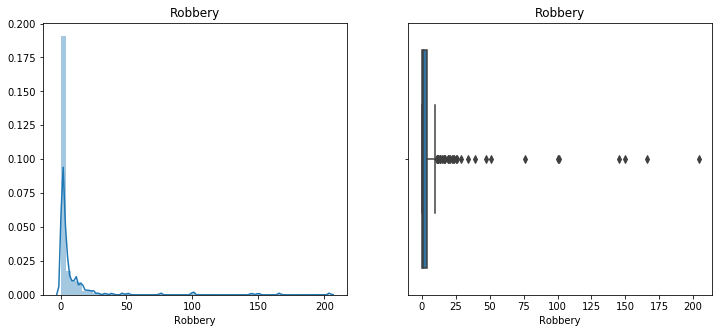

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Robbery'])
plt.title('Robbery')

plt.subplot(1, 2, 2)
sns.boxplot(df['Robbery'])
plt.title('Robbery')

plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 347
Data columns (total 4 columns):
Population                              330 non-null float64
Murder and
nonnegligent
manslaughter    330 non-null float64
Robbery                                 330 non-null float64
Property
crime                          330 non-null float64
dtypes: float64(4)
memory usage: 12.9 KB


In [12]:
df.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
0,1861.000,0.000,0.000,12.000
1,2577.000,0.000,0.000,24.000
2,2846.000,0.000,0.000,16.000
4,6388.000,0.000,4.000,223.000
5,4089.000,0.000,3.000,46.000


In [13]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
count,330.000,330.000,330.000,330.000
mean,11203.055,0.194,6.300,232.470
std,11566.162,0.839,20.970,340.569
min,526.000,0.000,0.000,0.000
25%,2843.000,0.000,0.000,38.000
50%,6688.500,0.000,1.000,105.000
75%,15294.250,0.000,4.000,309.250
max,55198.000,10.000,204.000,2807.000


In [14]:
#Create a DF with all of the features
features = pd.DataFrame()
features['population'] = df['Population']
features['population_sq'] = df['Population']**2
features['murder'] = df['Murder and\nnonnegligent\nmanslaughter']
features['robbery'] = df['Robbery']
features['murder_binary'] = np.where(df['Murder and\nnonnegligent\nmanslaughter']>0, 1, 0)
features['robbery_binary'] = np.where(df['Robbery']>0, 1, 0)

In [15]:
features.describe()

,population,population_sq,murder,robbery,murder_binary,robbery_binary
count,330.000,330.000,330.000,330.000,330.000,330.000
mean,11203.055,258879158.358,0.194,6.300,0.109,0.579
std,11566.162,497495938.708,0.839,20.970,0.312,0.495
min,526.000,276676.000,0.000,0.000,0.000,0.000
25%,2843.000,8082652.000,0.000,0.000,0.000,0.000
50%,6688.500,44736188.500,0.000,1.000,0.000,1.000
75%,15294.250,233914570.750,0.000,4.000,0.000,1.000
max,55198.000,3046819204.000,10.000,204.000,1.000,1.000


In [16]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property\ncrime']
X = features
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Print coefficients, Y Intercept and R-squared
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  1.20857495e-02   2.43240068e-08  -1.86044847e+02   1.09165396e+01
   2.72256009e+02   6.31454702e+01]

Intercept: 
 -8.16585505777

R-squared:
0.797948399346


### The initial model has an R squared value of .798
The features used to predict property crime were population, population squared, murder, murder as a binary category, robbery, and robbery as a binary category.

#### Let's take a closer look at how the model is performing and validate it on some new data.

# Assumptions of linear regression

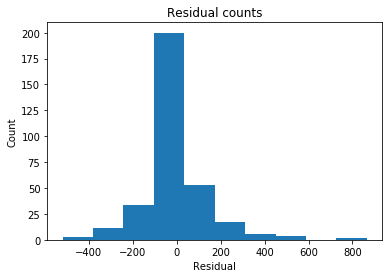

In [18]:
# Examine the distribution of the error.
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# The residuals look farily normal, but have long tails
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

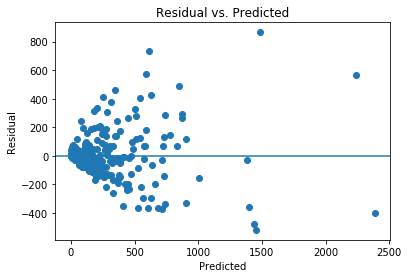

In [19]:
# Examine the homoscedasticity of the initial model
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# This doesn't look good. The model does worse job predicting the higher the predicted values get.

In [20]:
#Check for multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)
#There is some high correlation between some of the features

,population,population_sq,murder,robbery,murder_binary,robbery_binary
population,1.000,0.945,0.438,0.576,0.475,0.490
population_sq,0.945,1.000,0.496,0.659,0.484,0.370
murder,0.438,0.496,1.000,0.786,0.662,0.190
robbery,0.576,0.659,0.786,1.000,0.482,0.257
murder_binary,0.475,0.484,0.662,0.482,1.000,0.279
robbery_binary,0.490,0.370,0.190,0.257,0.279,1.000


# Validating the model
* Look at test statistics 
* Cross Validate
* try on new dataset

In [21]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, scoring = 'r2')
#That's a fairly wide range of r squares values.

array([ 0.78661716,  0.70106243,  0.63274813])

In [48]:
# Train test split method
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Training set: ' + str(regr.fit(X, Y).score(X, Y)))
# Model perfoms considerably worse with holdout group. A sign of overfitting.

With 20% Holdout: 0.7192297747
Training set: 0.742567404528


In [23]:
# When this cell was above cross validation it turned the R squared values to 1????
# Look at test statistics
import statsmodels.formula.api as smf
from scipy import stats

data = features
data['property'] = df['Property\ncrime']

#Specify interaction
linear_formula = 'property ~ population+population_sq+murder+robbery+murder_binary+robbery_binary'

# Run model and print results
lm = smf.ols(formula=linear_formula, data=data).fit()
print(lm.summary())

#The P value for population_sq is .696, showing that it doesn't have any effect.

                            OLS Regression Results                            
Dep. Variable:               property   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     212.6
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          5.77e-109
Time:                        17:37:32   Log-Likelihood:                -2128.0
No. Observations:                 330   AIC:                             4270.
Df Residuals:                     323   BIC:                             4297.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.1659     16.209     -0.

In [43]:

linear_formula = 'property ~ population+murder+robbery+murder_binary+robbery_binary'

# Run model and print results
lm = smf.ols(formula=linear_formula, data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               property   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     255.8
Date:                Sat, 02 Jun 2018   Prob (F-statistic):          3.70e-110
Time:                        17:41:44   Log-Likelihood:                -2128.1
No. Observations:                 330   AIC:                             4268.
Df Residuals:                     324   BIC:                             4291.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -11.4145     13.905     -0.

In [42]:
regr = linear_model.LinearRegression()
Y = df['Property\ncrime']
X = features
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  3.91013701e-04   1.11635593e+00   3.43695820e+00]

Intercept: 
 3.92833973658

R-squared:
0.742567404528


## Trying the model on 2014 data

In [24]:
df2 = pd.read_excel('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls', skiprows=4)
df2 = df2[['Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']]
df2 = df2[df2['Population'] < df2['Population'].quantile(0.95)]
df2 = df2.dropna()
features2 = pd.DataFrame()
features2['population'] = df2['Population']
features2['population_sq'] = df2['Population']**2
features2['murder'] = df2['Murder and\nnonnegligent\nmanslaughter']
features2['robbery'] = df2['Robbery']
features2['murder_binary'] = np.where(df2['Murder and\nnonnegligent\nmanslaughter']>0, 1, 0)
features2['robbery_binary'] = np.where(df2['Robbery']>0, 1, 0)

features2.head()

,population,population_sq,murder,robbery,murder_binary,robbery_binary
0,1851.000,3426201.000,0.000,0.000,0,0
1,2568.000,6594624.000,0.000,1.000,0,1
2,820.000,672400.000,0.000,0.000,0,0
3,2842.000,8076964.000,0.000,0.000,0,0
5,5872.000,34480384.000,0.000,2.000,0,1


In [25]:
Y2 = df2['Property\ncrime']
X2 = features2
print(regr.score(X2, Y2))

0.706138268537


In [50]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [  3.91013701e-04   1.11635593e+00   3.43695820e+00]

Intercept: 
 3.92833973658

R-squared:
0.742567404528


### The R squared value for the initial model on the new data is .742

## Revised Model

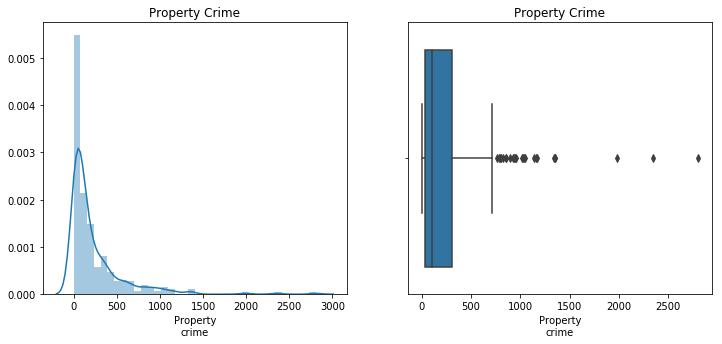

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df['Property\ncrime'])
plt.title('Property Crime')

plt.subplot(1, 2, 2)
sns.boxplot(df['Property\ncrime'])
plt.title('Property Crime')

plt.show()

In [27]:
Y = df['Property\ncrime'].apply(np.sqrt)

In [28]:
features = pd.DataFrame()
features['population'] = df['Population']
features['murder'] = (df['Murder and\nnonnegligent\nmanslaughter']+1).apply(np.log)
features['robbery'] = (df['Robbery']+1).apply(np.log)
features['murder_binary'] = np.where(df['Murder and\nnonnegligent\nmanslaughter']>0, 1, 0)
features['robbery_binary'] = np.where(df['Robbery']>0, 1, 0)

In [29]:
regr = linear_model.LinearRegression()
#Y = df['Property\ncrime']
X = features
X.head()

,population,murder,robbery,murder_binary,robbery_binary
0,1861.000,0.000,0.000,0,0
1,2577.000,0.000,0.000,0,0
2,2846.000,0.000,0.000,0,0
4,6388.000,0.000,1.609,0,1
5,4089.000,0.000,1.386,0,1



Coefficients: 
 [  3.23061011e-04  -3.84453291e+00   4.09143533e+00   3.46558327e+00
   4.51313957e-01]

Intercept: 
 4.59628564834

R-squared:
0.820756890102


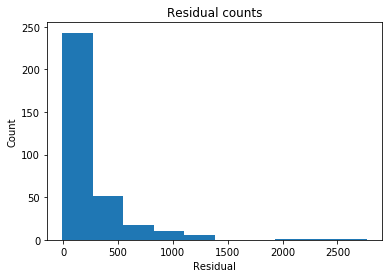

In [30]:
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

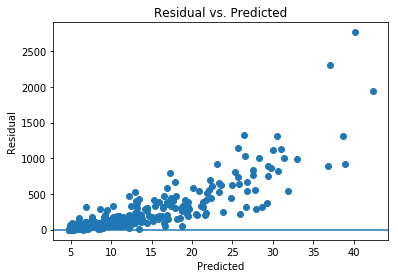

In [31]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [47]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, scoring = 'r2', cv=10)

array([ 0.78679946,  0.74698485,  0.71830267,  0.73005281,  0.71269766,
        0.70550419,  0.71195462,  0.66821811,  0.57563368,  0.72239704])

With the new model, the R squared improved to .82 and the cross validation scores became more consistent. However the residuals are very skewed now. 

## 3rd Iteration of model

In [33]:
#Trying again
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', skiprows=4)
df = df[['Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']]
df = df[df['Population'] < df['Population'].quantile(0.90)]
df = df.dropna()

In [34]:
df['Property\ncrime'] = df['Property\ncrime'].apply(np.sqrt)
features = pd.DataFrame()
features['population'] = df['Population']
features['murder'] = (df['Murder and\nnonnegligent\nmanslaughter']+1).apply(np.log)
features['robbery'] = (df['Robbery']+1).apply(np.log)
#features['murder_binary'] = np.where(df['Murder and\nnonnegligent\nmanslaughter']>0, 1, 0)
#features['robbery_binary'] = np.where(df['Robbery']>0, 1, 0)


Coefficients: 
 [  3.56393017e-04  -1.72396221e+00   4.19111115e+00]

Intercept: 
 4.63409823836

R-squared:
0.780968046403


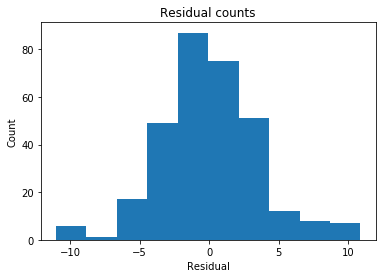

In [35]:
regr = linear_model.LinearRegression()
Y = df['Property\ncrime']
X = features
X.head()
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

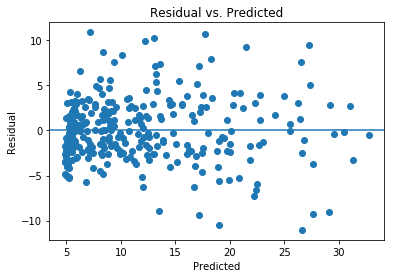

In [36]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [44]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, scoring = 'r2', cv=10)

array([ 0.78679946,  0.74698485,  0.71830267,  0.73005281,  0.71269766,
        0.70550419,  0.71195462,  0.66821811,  0.57563368,  0.72239704])

#### For the 3rd Iteration the residuals are more normally distributed, however the residuals still increase for the larger numbers.

### Trying the 3rd Iteration on the 2014 data

0.721743952548


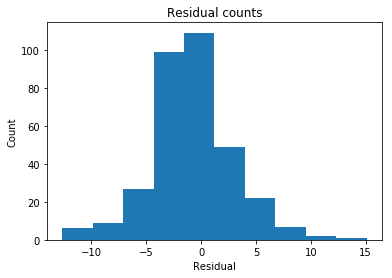

In [38]:
#Trying 3rd model on 2014 data
df = pd.read_excel('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls', skiprows=4)
df = df[['Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']]
df = df[df['Population'] < df['Population'].quantile(0.90)]
df = df.dropna()
df['Property\ncrime'] = df['Property\ncrime'].apply(np.sqrt)
features = pd.DataFrame()
features['population'] = df['Population']
features['murder'] = (df['Murder and\nnonnegligent\nmanslaughter']+1).apply(np.log)
features['robbery'] = (df['Robbery']+1).apply(np.log)
#features['murder_binary'] = np.where(df['Murder and\nnonnegligent\nmanslaughter']>0, 1, 0)
#features['robbery_binary'] = np.where(df['Robbery']>0, 1, 0)
Y = df['Property\ncrime']
X = features
print(regr.score(X, Y))
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

For the 2014 data, the 3rd model R squared was reduced to .722

In [45]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, scoring = 'r2', cv=10)

array([ 0.78679946,  0.74698485,  0.71830267,  0.73005281,  0.71269766,
        0.70550419,  0.71195462,  0.66821811,  0.57563368,  0.72239704])

# Discussion

#### Based on the tests of the inital model, population squared was dropped because it's high p-value showed that it was not statistically significant. Squaring the property crime, and log transforming the murder and robbery variables helped normalize the distribution of the residuals. Dropping murder binary and robbery binary helped improve the homoscendasticity. Overall though, the model still seems to be overfitting as indicated by the wide range of cross validation scores.